In [2]:
import pyclesperanto as cle
import numpy as np
import matplotlib.pyplot as plt

array([[1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 6],
       [1, 1, 1, ..., 5, 6, 6],
       ...,
       [1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 6]], shape=(200, 1000), dtype=uint32, mtype=buffer)
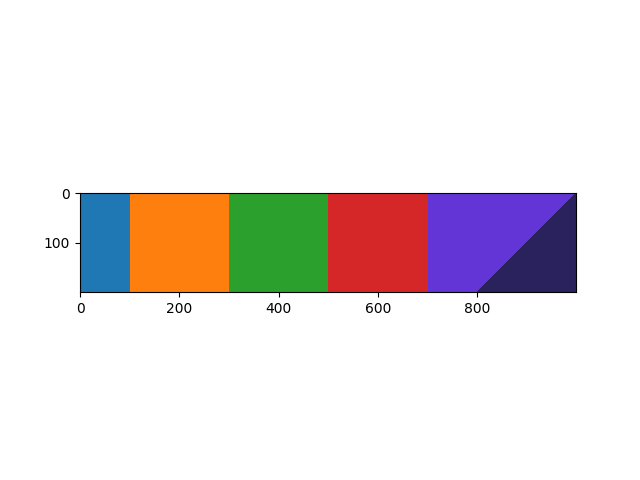

In [9]:
def generate_example_data():
    sigmas = [0, 2, 5, 8, 10]
    result = None
    for sigma in sigmas:
        tissue = cle.artificial_tissue(
            sigma_x=sigma, 
            sigma_y=sigma, 
            width=200, 
            height=200)
        if result is None:
            result = tissue
        else:
            result = cle.concatenate_along_x(result, tissue)
    
    borders = cle.detect_label_edges(result)
    objects = cle.binary_not(borders)
    result = cle.voronoi_labeling(objects)
    
    return result

labels = generate_example_data()
labels

array([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 1.],
       [1., 1., 1., ..., 2., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(200, 1000), dtype=float32, mtype=buffer)
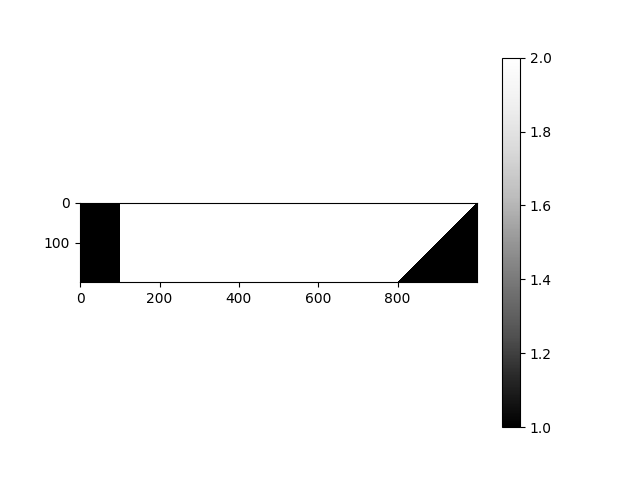
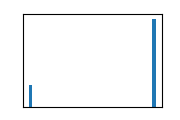

In [10]:
neighbor_count_map = cle.touching_neighbor_count_map(labels)
neighbor_count_map

array([[0.4082483, 0.4082483, 0.4082483, ..., 0.3651484, 0.3651484,
        0.3651484],
       [0.4082483, 0.4082483, 0.4082483, ..., 0.3651484, 0.3651484,
        0.4082483],
       [0.4082483, 0.4082483, 0.4082483, ..., 0.3651484, 0.4082483,
        0.4082483],
       ...,
       [0.4082483, 0.4082483, 0.4082483, ..., 0.4082483, 0.4082483,
        0.4082483],
       [0.4082483, 0.4082483, 0.4082483, ..., 0.4082483, 0.4082483,
        0.4082483],
       [0.4082483, 0.4082483, 0.4082483, ..., 0.4082483, 0.4082483,
        0.4082483]], shape=(200, 1000), dtype=float32, mtype=buffer)
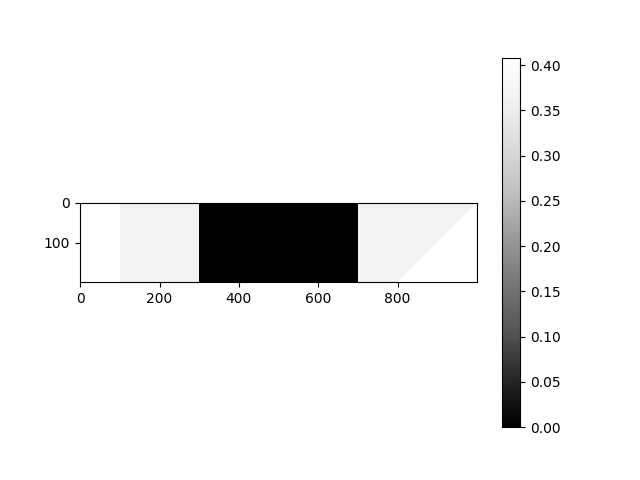
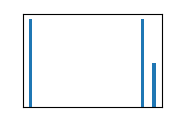

In [12]:
std_neighbor_count_map = cle.standard_deviation_of_touching_neighbors_map(neighbor_count_map, labels)
std_neighbor_count_map

array([[1.5      , 1.5      , 1.5      , ..., 1.6666666, 1.6666666,
        1.6666666],
       [1.5      , 1.5      , 1.5      , ..., 1.6666666, 1.6666666,
        1.5      ],
       [1.5      , 1.5      , 1.5      , ..., 1.6666666, 1.5      ,
        1.5      ],
       ...,
       [1.5      , 1.5      , 1.5      , ..., 1.5      , 1.5      ,
        1.5      ],
       [1.5      , 1.5      , 1.5      , ..., 1.5      , 1.5      ,
        1.5      ],
       [1.5      , 1.5      , 1.5      , ..., 1.5      , 1.5      ,
        1.5      ]], shape=(200, 1000), dtype=float32, mtype=buffer)
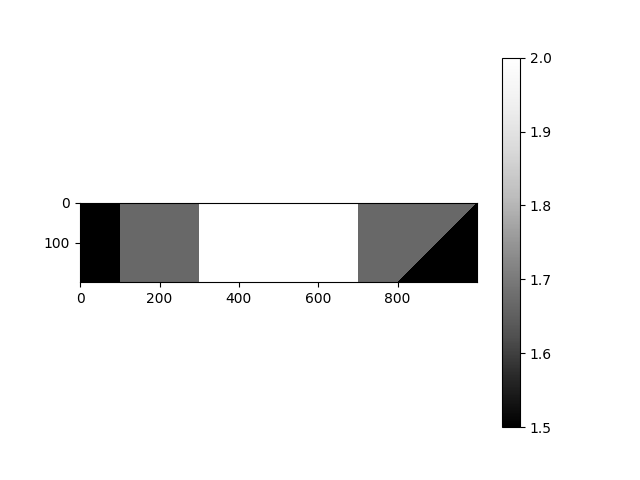
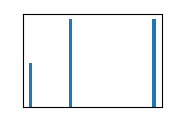

In [13]:
mean_neighbor_count_map = cle.mean_of_touching_neighbors_map(neighbor_count_map, labels)
mean_neighbor_count_map

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]], shape=(200, 1000), dtype=float32, mtype=buffer)
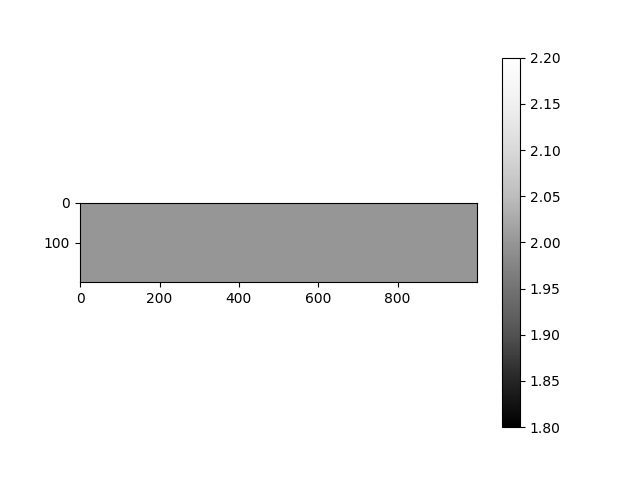
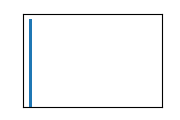

In [14]:
cle.maximum_of_touching_neighbors_map(neighbor_count_map, labels)